# Differential equations - Numerical methods

_Ruslan Shakirov, B17-2_

Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Initial equation

In [39]:
yprime = lambda x, y: np.power(y, 4) * np.cos(x) + y * np.tan(x)

Exact solution

In [104]:
exact = lambda x: 1 / (np.cbrt(np.cos(x) ** 2 * (np.cos(x) - 3 * np.sin(x))))

## Helper functions

- `close_on_period()` - checks whether the number lies on function period
- `close_to_asymptote()` - checks whether the number is near asymptote

In [109]:
def close_on_period(x: float, per: float, eps: float, shift=0.0) -> bool:
    x -= shift
    return abs(x % per) < eps or abs((x % per) - per) < eps

def arccot(val):
    if np.real(val) < 0:
        return -np.pi / 2 - np.arctan(val)
    else:
        return np.pi / 2 - np.arctan(val)

def close_to_asymptote(x: float, eps:float) -> bool:
    r1 = close_on_period(x, np.pi, eps, np.pi / 2)
    r2 = close_on_period(x, np.pi, eps, arccot(3))
#     r2 = close_on_period(x, 2 * np.pi, eps, -2 * np.arctan(3 - np.sqrt(10)))
#     r3 = close_on_period(x, 2 * np.pi, eps, -2 * np.arctan(3 + np.sqrt(10)))
    
    return any([r1, r2])

## Computing values

Euler method

In [121]:
def euler(x0: float, y0: float, x: float, h: float) -> (list, list):
    values = [(x0, y0)]
    errors = [0]
    i = x0
    
    while i < x:
        i += h
        
        if close_to_asymptote(i, h):
            i += h * 2
            values.append((i, exact(i)))
            errors.append(0)
            continue
        
        xprev, yprev = values[-1]
        ynew = yprev + h * yprime(xprev, yprev)
        
        if ynew > 1200: ynew = 1200
        if ynew < -1200: ynew = -1200
        
        values.append((i, ynew))
        errors.append(np.abs(exact(i) - ynew))
        
    return values, errors

Improved Euler method

In [118]:
def euler_improved(x0: float, y0: float, x: float, h: float) -> (list, list):
    values = [(x0, y0)]
    errors = [0]
    i = x0
    
    while i < x:
        i += h
        
        if close_to_asymptote(i, h):
            i += h * 2
            values.append((i, exact(i)))
            errors.append(0)
            continue
        
        xprev, yprev = values[-1]
        ydelta = h * yprime(xprev + h / 2, yprev + (h / 2) * yprime(xprev, yprev))
        ynew = yprev + ydelta
        
        if ynew > 1200: ynew = 1200
        if ynew < -1200: ynew = -1200
        
        values.append((i, ynew))
        errors.append(np.abs(exact(i) - ynew))
    
    return values, errors

Runge-Kutta method

In [120]:
def runge_kutta(x0: float, y0: float, x: float, h: float) -> (list, list):
    values = [(x0, y0)]
    errors = [0]
    i = x0
    
    while i < x:
        i += h
        
        if close_to_asymptote(i, h):
            i += h * 2
            values.append((i, exact(i)))
            errors.append(0)
            continue
        
        xprev, yprev = values[-1]
        k1 = yprime(xprev, yprev)
        k2 = yprime(xprev + h / 2, yprev + (h * k1) / 2)
        k3 = yprime(xprev + h / 2, yprev + (h * k2) / 2)
        k4 = yprime(xprev + h, yprev + h * k3)
        ydelta = (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        ynew = yprev + ydelta
        
        if ynew > 1200: ynew = 1200
        if ynew < -1200: ynew = -1200
        
        values.append((i, ynew))
        errors.append(np.abs(exact(i) - ynew))
    
    return values, errors

## Making plots

Solution plots

<IPython.core.display.Javascript object>


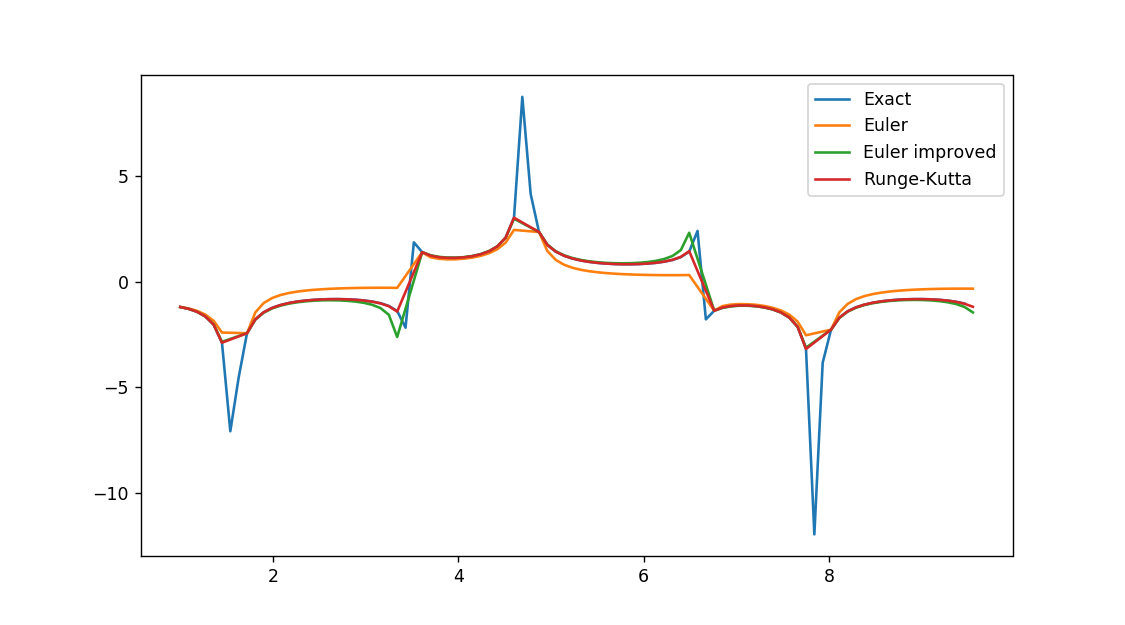

In [146]:
x0, y0, x, h = 1, exact(1), 9.5, 0.09 # initial conditions

sol_euler, euler_error = euler(x0, y0, x, h)
euler_x, euler_y = [], []
for i in sol_euler:
    euler_x.append(i[0])
    euler_y.append(i[1])
    
sol_euler_im, euler_im_error = euler_improved(x0, y0, x, h)
euler_im_x, euler_im_y = [], []
for i in sol_euler_im:
    euler_im_x.append(i[0])
    euler_im_y.append(i[1])
    
sol_rk, rk_error = runge_kutta(x0, y0, x, h)
rk_x, rk_y = [], []
for i in sol_rk:
    rk_x.append(i[0])
    rk_y.append(i[1])
    
exact_x = np.arange(x0, x, h)
exact_y = exact(exact_x)
    
%matplotlib notebook
plt.figure(figsize=(9, 5))
plt.plot(exact_x, exact_y, label='Exact')
plt.plot(euler_x, euler_y, label='Euler')
plt.plot(euler_im_x, euler_im_y, label='Euler improved')
plt.plot(rk_x, rk_y, label='Runge-Kutta')
plt.legend()
plt.show()

Make error plot

<IPython.core.display.Javascript object>


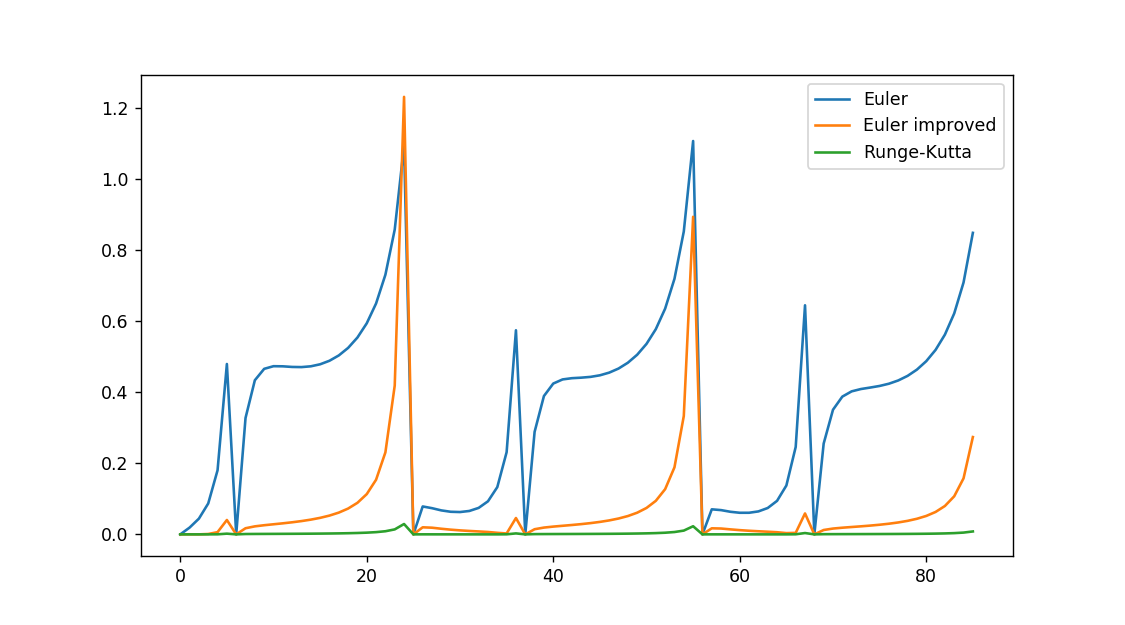

In [147]:
plt.figure(figsize=(9,5))
plt.plot(euler_error, label='Euler')
plt.plot(euler_im_error, label='Euler improved')
plt.plot(rk_error, label='Runge-Kutta')
plt.legend()
plt.show()